## 3º Hack Days Comunidade DS

### 0.0 Libraries, Functions and Loading Data

In [4]:
import pandas as pd
import numpy as np
from sklearn import model_selection as ms
import seaborn as sns
import sweetviz as sv

#### 0.1 Functions

#### 0.2 Loading Data

In [5]:
train_raw = pd.read_csv('csv_files/train.csv')
test_raw = pd.read_csv('csv_files/test.csv')

In [6]:
# Spliting target variable column
X = train_raw.drop('limite_adicional', axis=1)
y = train_raw['limite_adicional'].copy()

# Spliting dataset into train and test datasets
x_train, x_test, y_train, y_test = ms.train_test_split(X, y, test_size=0.20, random_state=42)

### 1.0 Data Description

In [7]:
df1 = pd.concat([x_train, y_train], axis=1)

#### 1.1 Shape

In [8]:
print(f'Números de linhas: {df1.shape[0]}')
print(f'Números de colunas: {df1.shape[1]}')

Números de linhas: 7600
Números de colunas: 17


#### 1.2 Columns

In [9]:
df1.columns

Index(['id_cliente', 'idade', 'saldo_atual', 'divida_atual', 'renda_anual',
       'valor_em_investimentos', 'taxa_utilizacao_credito', 'num_emprestimos',
       'num_contas_bancarias', 'num_cartoes_credito', 'dias_atraso_dt_venc',
       'num_pgtos_atrasados', 'num_consultas_credito', 'taxa_juros',
       'investe_exterior', 'pessoa_polit_exp', 'limite_adicional'],
      dtype='object')

#### 1.3 Data Types

In [10]:
df1.dtypes

id_cliente                   int64
idade                        int64
saldo_atual                float64
divida_atual               float64
renda_anual                float64
valor_em_investimentos     float64
taxa_utilizacao_credito    float64
num_emprestimos              int64
num_contas_bancarias         int64
num_cartoes_credito          int64
dias_atraso_dt_venc          int64
num_pgtos_atrasados          int64
num_consultas_credito        int64
taxa_juros                   int64
investe_exterior            object
pessoa_polit_exp            object
limite_adicional            object
dtype: object

#### 1.4 Check NA

In [11]:
df1.isna().sum()

id_cliente                 0
idade                      0
saldo_atual                0
divida_atual               0
renda_anual                0
valor_em_investimentos     0
taxa_utilizacao_credito    0
num_emprestimos            0
num_contas_bancarias       0
num_cartoes_credito        0
dias_atraso_dt_venc        0
num_pgtos_atrasados        0
num_consultas_credito      0
taxa_juros                 0
investe_exterior           0
pessoa_polit_exp           0
limite_adicional           0
dtype: int64

#### 1.5 Descriptive Statistics

In [12]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
id_cliente,7600.0,6195.151184,3.590736e+03,1.000000,3101.250000,6135.000000,9298.250000,1.250000e+04
idade,7600.0,123.613684,6.767724e+02,18.000000,28.000000,38.000000,47.000000,8.598000e+03
saldo_atual,7600.0,403.503742,2.175478e+02,0.908146,271.744768,337.139895,470.944544,1.602041e+03
divida_atual,7600.0,1442.200337,1.160883e+03,0.230000,573.707500,1178.340000,1972.337500,4.998070e+03
renda_anual,7600.0,182809.120450,1.391849e+06,10473.865350,26205.526007,45899.953750,80399.209075,2.310824e+07
valor_em_investimentos,7600.0,611.175524,1.999520e+03,0.000000,76.063639,134.201478,251.619466,1.000000e+04
taxa_utilizacao_credito,7600.0,32.235292,5.133365e+00,20.992914,27.991416,32.205033,36.437150,4.956452e+01
num_emprestimos,7600.0,11.195789,6.453960e+01,0.000000,2.000000,3.000000,6.000000,1.496000e+03
num_contas_bancarias,7600.0,17.816447,1.225567e+02,0.000000,3.000000,6.000000,8.000000,1.756000e+03
num_cartoes_credito,7600.0,21.951447,1.247211e+02,1.000000,4.000000,6.000000,7.000000,1.479000e+03


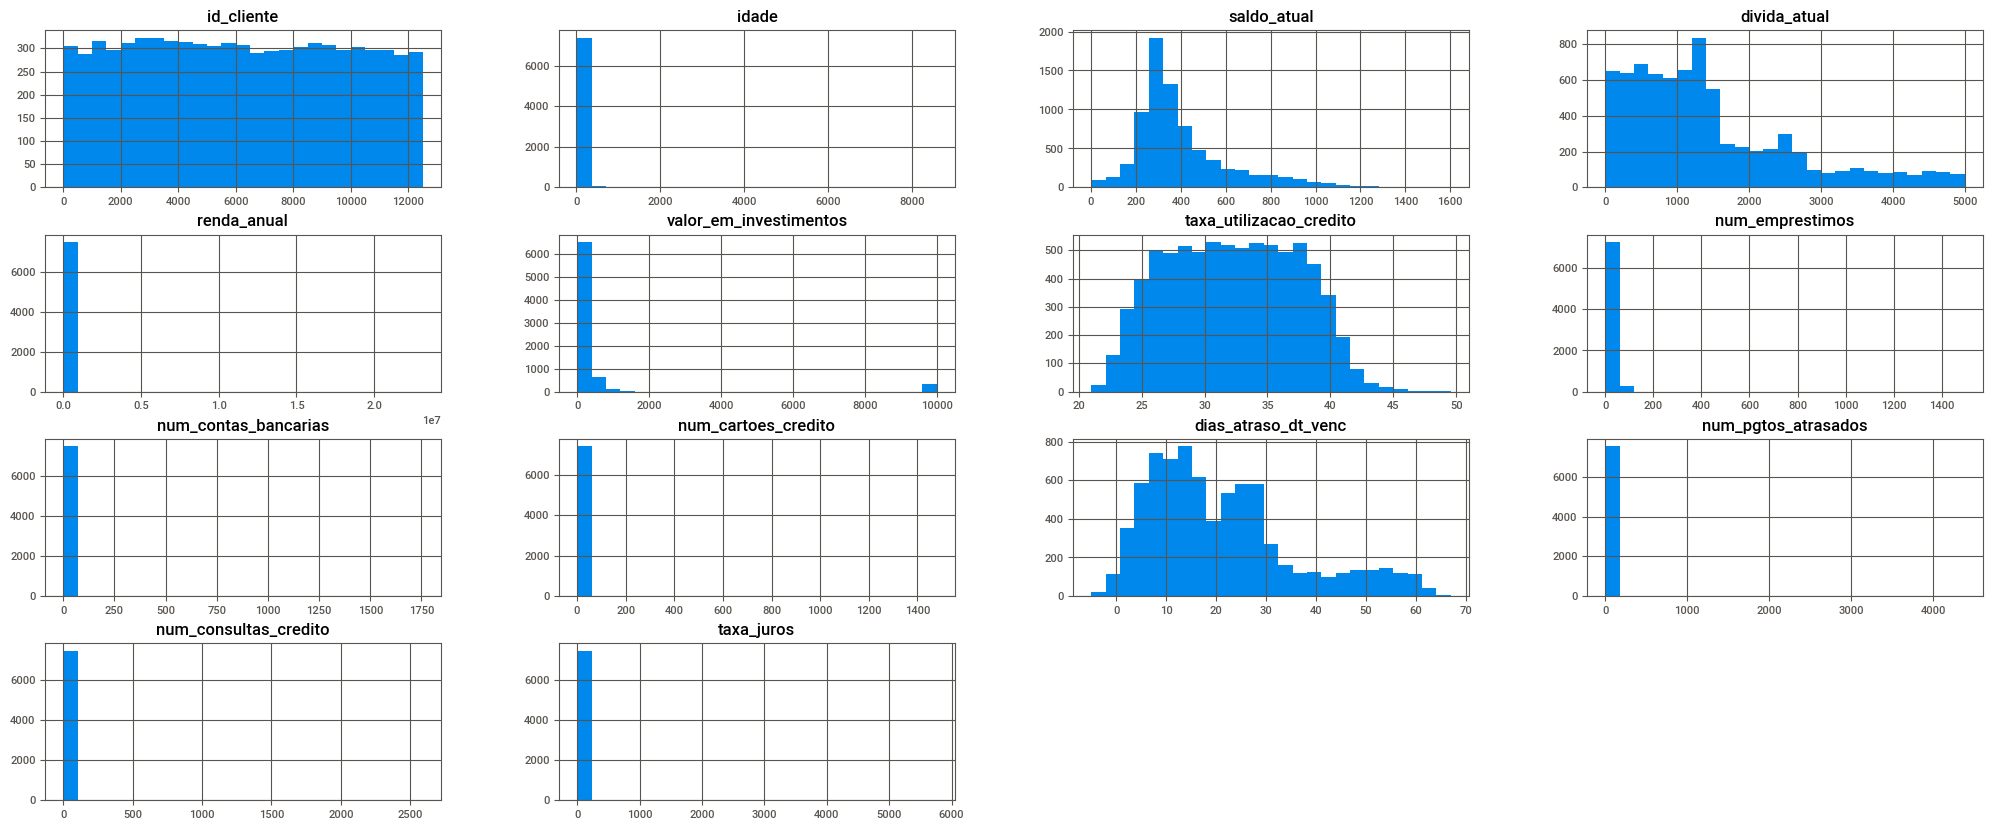

In [26]:
num_attributes = df1.select_dtypes(include=['float64', 'int64'])
cat_attributes = df1.select_dtypes(exclude=['float64', 'int64'])
num_attributes.hist(figsize=(25, 10), bins=25);

In [14]:
d1 = pd.DataFrame(num_attributes.apply(lambda x: x.skew())).T
d2 = pd.DataFrame(num_attributes.apply(lambda x: x.kurtosis())).T
d3 = pd.concat([d1, d2]).T.reset_index()
d3.columns = ['attributes', 'skew', 'kurtosis']
d3

,attributes,skew,kurtosis
0,id_cliente,0.025183,-1.195675
1,idade,9.252848,90.657098
2,saldo_atual,1.618415,3.114865
3,divida_atual,1.178158,0.803166
4,renda_anual,12.410241,162.923722
5,valor_em_investimentos,4.443809,17.937286
6,taxa_utilizacao_credito,0.053696,-0.919013
7,num_emprestimos,16.189707,303.296082
8,num_contas_bancarias,10.723897,119.087686
9,num_cartoes_credito,8.425038,74.368182


### 2.0 Feature Engineering

In [28]:
df2 = df1.copy()

In [29]:
# Potential investor/age
df2['pot_inv'] = df2['valor_em_investimentos'] / (df2['idade'] - 17) 
x_test['pot_inv'] = x_test['valor_em_investimentos'] / (x_test['idade'] - 17) 
test_raw['pot_inv'] = test_raw['valor_em_investimentos'] / (test_raw['idade'] - 17) 


# Potential debt/year
df2['pot_endiv'] = df2['divida_atual'] / (df2['idade'] - 17)
x_test['pot_endiv'] = x_test['divida_atual'] / (x_test['idade'] - 17)
test_raw['pot_endiv'] = test_raw['divida_atual'] / (test_raw['idade'] - 17)


# Potential per capita investment
df2['pot_capital'] = df2['pot_endiv'] - df2['pot_inv']
x_test['pot_capital'] = x_test['pot_endiv'] - x_test['pot_inv']
test_raw['pot_capital'] = test_raw['pot_endiv'] - test_raw['pot_inv']


# Debt by income
df2['renda_divida'] = df2['divida_atual'] / df2['renda_anual']
x_test['renda_divida'] = x_test['divida_atual'] / x_test['renda_anual']
test_raw['renda_divida'] = test_raw['divida_atual'] / test_raw['renda_anual']


# Salary withheld
df2['salario_retido'] =  df2['divida_atual'] / df2['renda_anual']
x_test['salario_retido'] =  x_test['divida_atual'] / x_test['renda_anual']
test_raw['salario_retido'] =  test_raw['divida_atual'] / test_raw['renda_anual']

### 3.0 Data Filtering

In [30]:
df3 = df2.copy()

### 4.0 Exploratory Data Analysis (EDA)

In [41]:
df4 = df3.copy()

In [42]:
num_attributes = df1.select_dtypes(include=['float64', 'int64'])
cat_attributes = df1.select_dtypes(exclude=['float64', 'int64'])

In [43]:
# Runing Sweetviz data visualization
sweet = sv.analyze(df4);
sweet.show_html();

/home/ricardo/anaconda3/envs/ide_py3_9/lib/python3.9/site-packages/sweetviz/dataframe_report.py:74: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  all_source_names = [cur_name for cur_name, cur_series in source_df.iteritems()]
/home/ricardo/anaconda3/envs/ide_py3_9/lib/python3.9/site-packages/sweetviz/dataframe_report.py:109: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  filtered_series_names_in_source = [cur_name for cur_name, cur_series in source_df.iteritems()


                                             |          | [  0%]   00:00 -> (? left)

/home/ricardo/anaconda3/envs/ide_py3_9/lib/python3.9/site-packages/sweetviz/series_analyzer_numeric.py:25: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  stats["mad"] = series.mad()
/home/ricardo/anaconda3/envs/ide_py3_9/lib/python3.9/site-packages/sweetviz/series_analyzer_numeric.py:25: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  stats["mad"] = series.mad()
/home/ricardo/anaconda3/envs/ide_py3_9/lib/python3.9/site-packages/sweetviz/series_analyzer_numeric.py:25: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  stats["mad"] = series.mad()
/home/ricardo/anaconda3/envs/ide_py3_9/lib/python3.9/site-packages/sweetviz/series_analyzer_numeric.py:25: Futur

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [49]:
num_attributes = df4.drop(['id_cliente'], axis=1)

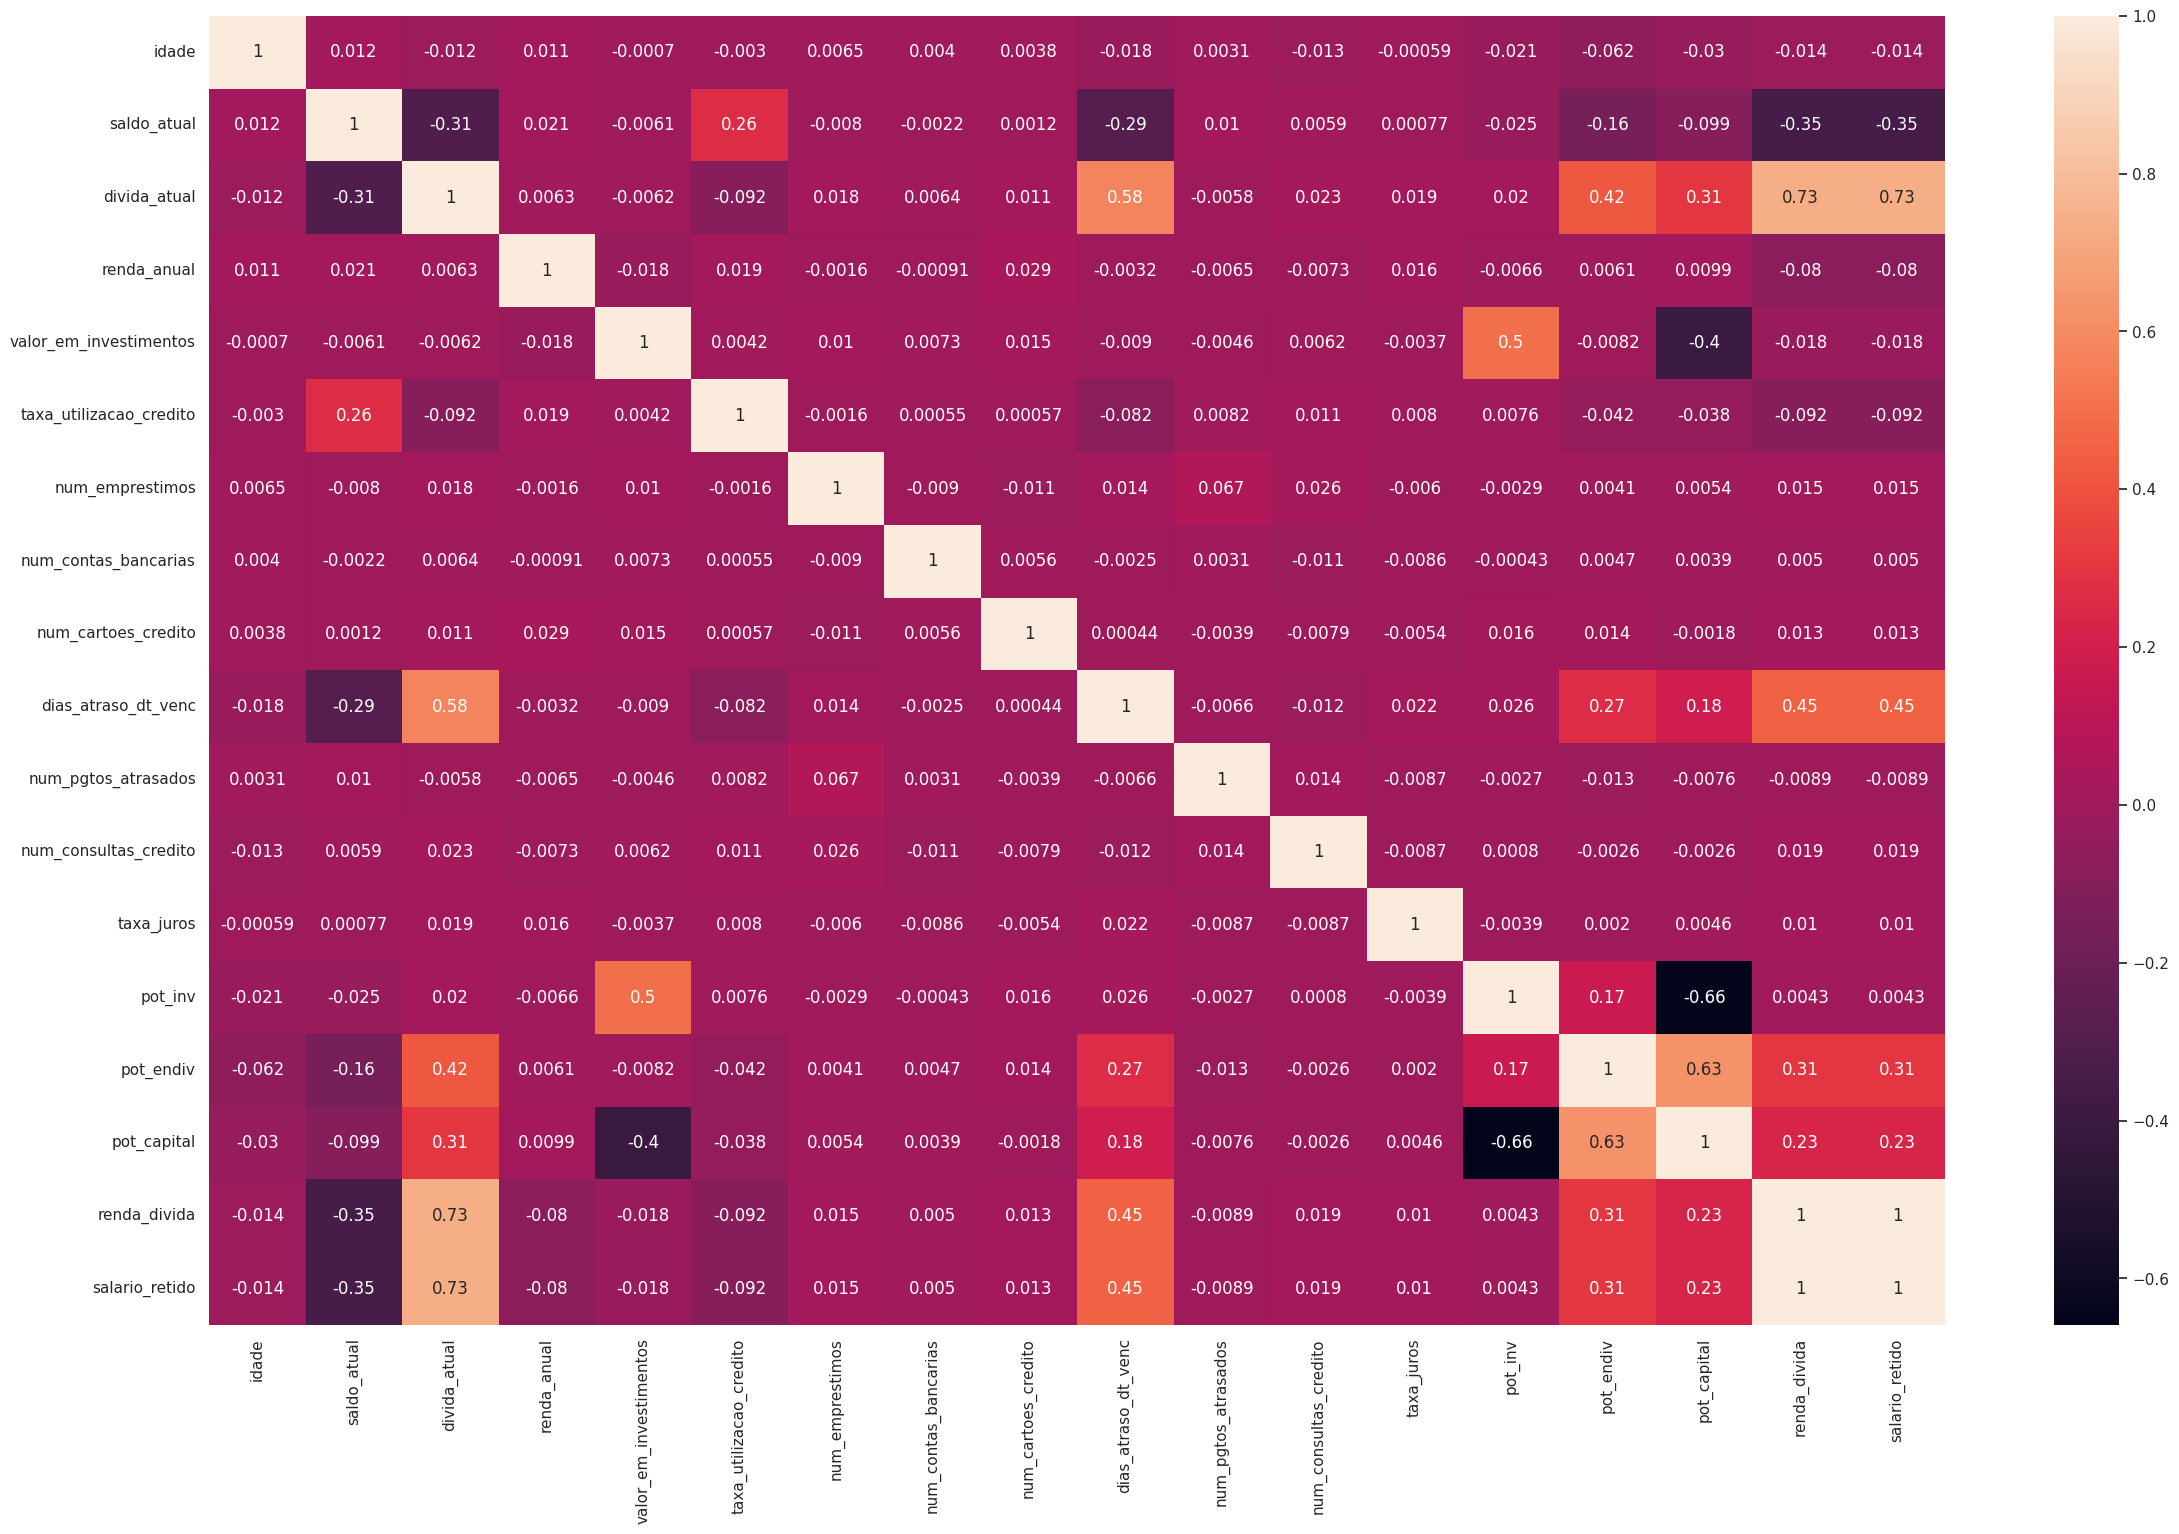

In [51]:
correlation = num_attributes.corr(method='pearson', numeric_only=True)
sns.heatmap(correlation, annot=True);
sns.set(rc={'figure.figsize':(28, 17)})

### 5.0 Transformation

In [ ]:
df5 = df4.copy()

In [ ]:
# X_train['idade'] = mms.fit_transform(X_train[['idade']].values)
# X_test['idade'] = mms.fit_transform(X_test[['idade']].values)
# X_valid['idade'] = mms.fit_transform(X_valid[['idade']].values)

# X_train['saldo_atual'] = np.log1p(X_train['saldo_atual'])
# X_test['saldo_atual'] = np.log1p(X_test['saldo_atual'])
# X_valid['saldo_atual'] = np.log1p(X_valid['saldo_atual'])

# X_train['divida_atual'] = np.log1p(X_train['divida_atual'])
# X_test['divida_atual'] = np.log1p(X_test['divida_atual'])
# X_valid['divida_atual'] = np.log1p(X_valid['divida_atual'])

# X_train['renda_anual'] = rs.fit_transform(X_train[['renda_anual']].values)
# X_test['renda_anual'] = rs.fit_transform(X_test[['renda_anual']].values)
# X_valid['renda_anual'] = rs.fit_transform(X_valid[['renda_anual']].values)

# X_train['valor_em_investimentos'] = rs.fit_transform(X_train[['valor_em_investimentos']].values)
# X_valid['valor_em_investimentos'] = rs.fit_transform(X_valid[['valor_em_investimentos']].values)
# X_valid['valor_em_investimentos'] = mms.fit_transform(X_valid[['valor_em_investimentos']].values)

# X_train['taxa_utilizacao_credito'] = mms.fit_transform(X_train[['taxa_utilizacao_credito']].values)
# X_test['taxa_utilizacao_credito'] = mms.fit_transform(X_test[['taxa_utilizacao_credito']].values)
# X_valid['taxa_utilizacao_credito'] = mms.fit_transform(X_valid[['taxa_utilizacao_credito']].values)

# X_train['num_emprestimos'] = rs.fit_transform(X_train[['num_emprestimos']].values)
# X_test['num_emprestimos'] = rs.fit_transform(X_test[['num_emprestimos']].values)
# X_valid['num_emprestimos'] = rs.fit_transform(X_valid[['num_emprestimos']].values)

# X_train['num_contas_bancarias'] = rs.fit_transform(X_train[['num_contas_bancarias']].values)
# X_test['num_contas_bancarias'] = rs.fit_transform(X_test[['num_contas_bancarias']].values)
# X_valid['num_contas_bancarias'] = rs.fit_transform(X_valid[['num_contas_bancarias']].values)

# X_train['num_cartoes_credito'] = rs.fit_transform(X_train[['num_cartoes_credito']].values)
# X_test['num_cartoes_credito'] = rs.fit_transform(X_test[['num_cartoes_credito']].values)
# X_valid['num_cartoes_credito'] = rs.fit_transform(X_valid[['num_cartoes_credito']].values)

# X_train['dias_atraso_dt_venc'] = np.log1p(X_train['dias_atraso_dt_venc'])
# X_test['dias_atraso_dt_venc'] = np.log1p(X_test['dias_atraso_dt_venc'])
# X_valid['dias_atraso_dt_venc'] = np.log1p(X_valid['dias_atraso_dt_venc'])

# X_train['num_pgtos_atrasados'] = rs.fit_transform(X_train[['num_pgtos_atrasados']].values)
# X_test['num_pgtos_atrasados'] = rs.fit_transform(X_test[['num_pgtos_atrasados']].values)
# X_valid['num_pgtos_atrasados'] = rs.fit_transform(X_valid[['num_pgtos_atrasados']].values)

# X_train['renda_anual'] = rs.fit_transform(X_train[['renda_anual']].values)
# X_test['renda_anual'] = rs.fit_transform(X_test[['renda_anual']].values)
# X_valid['renda_anual'] = rs.fit_transform(X_valid[['renda_anual']].values)

# X_train['valor_em_investimentos'] = rs.fit_transform(X_train[['valor_em_investimentos']].values)
# X_test['valor_em_investimentos'] = rs.fit_transform(X_test[['valor_em_investimentos']].values)
# X_valid['valor_em_investimentos'] = rs.fit_transform(X_valid[['valor_em_investimentos']].values)

# X_train['taxa_utilizacao_credito'] = mms.fit_transform(X_train[['taxa_utilizacao_credito']].values)
# X_test['taxa_utilizacao_credito'] = mms.fit_transform(X_test[['taxa_utilizacao_credito']].values)
# X_valid['taxa_utilizacao_credito'] = mms.fit_transform(X_valid[['taxa_utilizacao_credito']].values)

# X_train['num_consultas_credito'] = rs.fit_transform(X_train[['num_consultas_credito']].values)
# X_test['num_consultas_credito'] = rs.fit_transform(X_test[['num_consultas_credito']].values)
# X_valid['num_consultas_credito'] = rs.fit_transform(X_valid[['num_consultas_credito']].values)

# X_train['taxa_juros'] = rs.fit_transform(X_train[['taxa_juros']].values)
# X_test['taxa_juros'] = rs.fit_transform(X_test[['taxa_juros']].values)
# X_valid['taxa_juros'] = rs.fit_transform(X_valid[['taxa_juros']].values)

# X_train['pot_inv'] = rs.fit_transform(X_train[['pot_inv']].values)
# X_test['pot_inv'] = rs.fit_transform(X_test[['pot_inv']].values)
# X_valid['pot_inv'] = rs.fit_transform(X_valid[['pot_inv']].values)

# X_train['pot_endiv'] = rs.fit_transform(X_train[['pot_endiv']].values)
# X_test['pot_endiv'] = rs.fit_transform(X_test[['pot_endiv']].values)
# X_valid['pot_endiv'] = rs.fit_transform(X_valid[['pot_endiv']].values)

# X_train['num_consultas_credito'] = rs.fit_transform(X_train[['num_consultas_credito']].values)
# X_test['num_consultas_credito'] = rs.fit_transform(X_test[['num_consultas_credito']].values)
# X_valid['num_consultas_credito'] = rs.fit_transform(X_valid[['num_consultas_credito']].values)

# X_train['pot_capital'] = rs.fit_transform(X_train[['pot_capital']].values)
# X_test['pot_capital'] = rs.fit_transform(X_test[['pot_capital']].values)
# X_valid['pot_capital'] = rs.fit_transform(X_valid[['pot_capital']].values)

# X_train['end_rend'] = rs.fit_transform(X_train[['end_rend']].values)
# X_test['end_rend'] = rs.fit_transform(X_test[['end_rend']].values)
# X_valid['end_rend'] = rs.fit_transform(X_valid[['end_rend']].values)

# X_train['comprometimento_salario'] = rs.fit_transform(X_train[['comprometimento_salario']].values)
# X_test['comprometimento_salario'] = rs.fit_transform(X_test[['comprometimento_salario']].values)
# X_valid['comprometimento_salario'] = rs.fit_transform(X_valid[['comprometimento_salario']].values)

# X_valid = X_valid.drop(['id_cliente'], axis = 1)
# X_valid = X_valid.drop(['pessoa_polit_exp'], axis = 1)

# enc = TargetEncoder(cols=['investe_exterior'])
# enc.fit(X_train, y_train)
# X_train = enc.transform(X_train)
# X_test = enc.transform(X_test)
# X_valid = enc.transform(X_valid)


### 6.0 Feature Selection

In [ ]:
df6 = df5.copy()

### 7.0 Machine Learning Modelling

In [ ]:
df7 = df6.copy()

#### Model X

In [ ]:
lgbm = LGBMClassifier(n_jobs=-1)
lgbm_model = lgbm.fit(X_train, y_train)
yh_lgbm = lgbm_model.predict(X_test)
yhp_lgbm = lgbm_model.predict_proba(X_test)

lgbm_result = df_scores(model_name='LGBMClassifier', y_test=y_test, y_pred=yh_lgbm, y_proba=yhp_lgbm, normalize=True)
lgbm_result

#### Model X CV

In [ ]:
lgbm_cv = cross_validation(lgbm, X_train, y_train, verb=True, k=10)
lgbm_cv

### 8.0 Hyperparameter Fine Tuning

In [ ]:
df8 = df7.copy()

#### 8.1 Random Search


In [ ]:
parameters = {'max_depth': np.arange(2, 12, 2), 
              'num_leaves': 2 ** np.arange(2, 10, 2),
              'min_data_in_leaf': np.arange(650, 1050, 50), 
              'learning_rate': np.linspace(0.001, 0.6, 15),
              'colsample_bytree': np.linspace(0.1, 1, 5),
              'subsample': np.linspace(0.01, 1, 15),
              'n_estimators': np.arange(10, 105, 15)}

lgbm_random_cv = RandomizedSearchCV(estimator=lgbm, param_distributions=parameters,
                                scoring='f1', n_iter=100, cv=10, verbose=2, n_jobs=-1)

a = lgbm_random_cv.fit(X_train, y_train)
a.best_estimator_

In [ ]:
lgbm_tunned = LGBMClassifier(learning_rate=0.3860714285714285, max_depth=10,
               min_data_in_leaf=650, n_estimators=40, num_leaves=256,
               subsample=0.3635714285714286)

lgbm_model = lgbm_tunned.fit(X_train, y_train)
yh = lgbm_model.predict(X_test)
yhp = lgbm_model.predict_proba(X_test)

lgbm_model = df_scores(model_name='LGBMClassifier Tunned', y_test=y_test, y_pred=yh, y_proba=yhp, normalize=True)

cross_validation(lgbm, X_train, y_train, verb=True, k=10)


### 9.0 Submission

In [ ]:
response = lgbm_tunned.predict(X_valid)
submission(response)

In [ ]:
lgbm_cv = cross_validation(lgbm, X_train, y_train, verb=True, k=10)
lgbm_cv